# Trabajo práctico Módulo 1
Exploración de Datos de Sitio de Ecommerce.<br>
El objetivo del Trabajo Práctico es realizar una Exploración de Datos completa sobre todo el dataset (todas las columnas).
Esta exploración involucra:

1. Entender el dominio del dataset. <br>
Para esto, hacerse algunas preguntas relevantes para el negocio, como por ejemplo:
  - ¿puede un usuario hacer compras sin acceder a ver primero el producto, o agregarlo al carrito? 
  - ¿Hay productos que sean comprados más de una vez por el mismo usuario? 
  - ¿cuántos usuarios abandonan el carrito? y otras similares. <br>
 El foco es entender lo más que se pueda el negocio.
2. Limpieza de datos.<br>
Involucra realizar acciones sobre todas las columnas de:
  - Revisión, eliminación o imputación de datos Nulos
  - Análisis de Nulos “no claros” (undefined? ceros? etc)
  - Evaluación de datos de outliers y análisis de los mismos, para decidir qué acción tomar.
  - Transformación de fechas, strings a numéricos y/o categórico y otras, en caso de ser necesario.
  - Limpieza de datos duplicados
  - Eliminación de datos innecesarios.
  - Análisis de Distribución Univariada de las columnas. 

3. Análisis de correlación y distribución multi-variada.
4. Elaboración de un proceso de tratamiento de datasets (suponga que le llega un dataset nuevo, el proceso debería realizar el mismo procesamiento realizado por Ud para obtener un dataset limpio y prolijo) Esto puede ser en un notebook o, idealmente, en código limpio (.py).

In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display_html
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Lectura del dataset
# df = pd.read_parquet('/content/gdrive/MyDrive/data-ecomm-10-19-smallsampled.parquet')
df = pd.read_parquet('data-ecomm-10-19-smallsampled.parquet')
# Visualizaciión de las primeras 5 filas
display(df.head())

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
39054315,2019-10-29 07:06:41 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,243.220,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba
2640418,2019-10-03 06:05:30 UTC,view,26020177,2053013562644759347,None,None,9.050,529412421,0ee743f2-1a41-4e6f-8d8e-cd38135032a0
24303444,2019-10-18 14:21:55 UTC,view,1307059,2053013558920217191,computers.notebook,apple,1569.920,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837
16337102,2019-10-13 08:46:22 UTC,view,12709948,2053013553559896355,None,triangle,36.940,550305198,56ef2383-4c9d-4475-adcd-d4eeb4205fde
41227753,2019-10-31 02:05:01 UTC,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.120,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307


Se identifican 9 columnas:
1. *event_time*: Horario UTC 
2. *event_type*: View, Chart, Puchase 
3. *produc_id*: id de producto
4. *category_id*: id de categoría
5. *category_code*: categoría de producto (árbol con niveles)
6. *brand*: Marca
7. *price*: Precio
8. *user_id*: id de usario
9. *user_session*: sesión de usuario.

## Coversión de la columna *event_time*
Se convierte la columna 'event_time' a formato fecha y se crean columnas nuevas referidas a eventos temporales: Mes, Dia, Hora.


In [3]:
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S UTC')
# Visualización de las primeras 5 filas
display_html(df.head().style.hide_index())

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2019-10-29 07:06:41,view,1004767,2053013555631882655,electronics.smartphone,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba
2019-10-03 06:05:30,view,26020177,2053013562644759347,None,None,9.050000,529412421,0ee743f2-1a41-4e6f-8d8e-cd38135032a0
2019-10-18 14:21:55,view,1307059,2053013558920217191,computers.notebook,apple,1569.920000,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837
2019-10-13 08:46:22,view,12709948,2053013553559896355,None,triangle,36.940000,550305198,56ef2383-4c9d-4475-adcd-d4eeb4205fde
2019-10-31 02:05:01,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307


In [4]:
df['event_month']= df['event_time'].dt.month    # Se crea la columna mes (útil para cuando se analicen varios meses juntos)
df['event_day'] = df['event_time'].dt.day       # Se crea la columna día 
df['event_hour'] = df['event_time'].dt.hour     # Se crea la columna hora
df.drop(columns=['event_time'], inplace=True)   # Se elimina del dataset la columna event_time
display_html(df.head().style.hide_index())

event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_month,event_day,event_hour
view,1004767,2053013555631882655,electronics.smartphone,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7
view,26020177,2053013562644759347,None,None,9.050000,529412421,0ee743f2-1a41-4e6f-8d8e-cd38135032a0,10,3,6
view,1307059,2053013558920217191,computers.notebook,apple,1569.920000,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837,10,18,14
view,12709948,2053013553559896355,None,triangle,36.940000,550305198,56ef2383-4c9d-4475-adcd-d4eeb4205fde,10,13,8
view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2


Se observa que la columna *category_code* tiene registros nulos (None). <br>
Se procede a eliminarlos pero antes, se visualiza la dispersión que presentan esos registros en la columna precio.

In [5]:
df[df['category_code'].isnull()].describe()

,product_id,category_id,price,user_id,event_month,event_day,event_hour
count,1914471.000,1914471.000,1914471.000,1914471.000,1914471.000,1914471.000,1914471.000
mean,19056704.937,2058797458196447488.000,169.504,531365101.786,10.000,15.693,11.111
std,11294240.804,19376799623983552.000,267.249,17668435.269,0.000,8.544,5.331
min,1480000.000,2053013552259662080.000,0.000,237271696.000,10.000,1.000,0.000
25%,12701289.000,2053013553559896320.000,38.280,515120807.000,10.000,9.000,7.000
50%,15900133.000,2053013558525952512.000,75.910,524734465.000,10.000,15.000,11.000
75%,26300651.000,2053013563651392256.000,191.770,547819293.000,10.000,23.000,16.000
max,60400011.000,2175419595093967616.000,2574.040,566280379.000,10.000,31.000,23.000


Notar que existe una gran cantidad de registros sin descripción de categoría y que el 75% de ellos se encuentra por deajo de los USD191.77. <br>
A continuación, veamos un gráfico de boxplot/violinplot.

<AxesSubplot:xlabel='price'>

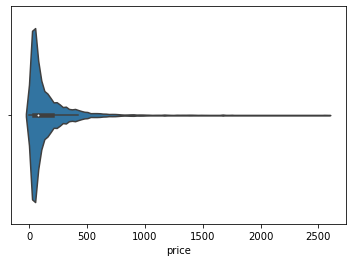

In [6]:
sns.violinplot(x=df[df['category_code'].isnull()]['price'])
#sns.boxplot(x=df[df['category_code'].isnull()]['price'])

In [7]:
# Se eliminan los registros con category_code nulo.
df.drop(df[df['category_code'].isnull() == True].index, inplace=True)
display_html(df.head().style.hide_index())

event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_month,event_day,event_hour
view,1004767,2053013555631882655,electronics.smartphone,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7
view,1307059,2053013558920217191,computers.notebook,apple,1569.920000,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837,10,18,14
view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2
view,1801874,2053013554415534427,electronics.video.tv,kivi,463.310000,531278066,21407301-47e7-4c20-8dd9-4095fa2b2e22,10,17,6
view,1004856,2053013555631882655,electronics.smartphone,samsung,130.990000,566187109,658f1874-588d-403e-b46d-f884e04eac27,10,31,16


# Se divide la columna *caterogy code*.
La columna category code es un árbol de categorías que se separa en columnas diferentes para un posterior tratamiento.

In [8]:
df_categories = df['category_code'].str.split('.', expand=True)  # Se crea un dataframe para categorias
n_categories = df_categories.shape[1]                            # Cantidad de categorías encontradas

# Se crea una lista con los niveles
category_level = []                                             
for k in range(n_categories):
  category_level.append('L'+str(k))

df_categories.columns = category_level                           # Se asignan los nombres  de los niveles a las columnas df_categories
df = pd.concat([df, df_categories], axis=1)                      # Se concatena el dataframe original con el dataframe categories
df.drop(columns='category_code', inplace=True)                   # Se elimina la columna de categorias del dataframe
display_html(df.head().style.hide_index())

event_type,product_id,category_id,brand,price,user_id,user_session,event_month,event_day,event_hour,L0,L1,L2,L3
view,1004767,2053013555631882655,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7,electronics,smartphone,None,None
view,1307059,2053013558920217191,apple,1569.920000,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837,10,18,14,computers,notebook,None,None
view,1005160,2053013555631882655,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2,electronics,smartphone,None,None
view,1801874,2053013554415534427,kivi,463.310000,531278066,21407301-47e7-4c20-8dd9-4095fa2b2e22,10,17,6,electronics,video,tv,None
view,1004856,2053013555631882655,samsung,130.990000,566187109,658f1874-588d-403e-b46d-f884e04eac27,10,31,16,electronics,smartphone,None,None


# Limpieza de duplicados
Se limpian aquellas filas que coinciden todas sus columnas.

In [9]:
df.drop_duplicates(inplace=True)

Se barren las categorías desde la más alta (L0) a la más baja para ver las estadísticas por nivel de categoría y ver en cuál conviene centrarse.

In [10]:
df['L0'].value_counts(normalize=True)[:5]

electronics   0.570
appliances    0.166
computers     0.076
apparel       0.055
furniture     0.041
Name: L0, dtype: float64

In [11]:
df.describe()

,product_id,category_id,price,user_id,event_month,event_day,event_hour
count,3140156.000,3140156.000,3140156.000,3140156.000,3140156.000,3140156.000,3140156.000
mean,6495485.665,2056498710882379520.000,337.953,532817014.674,10.000,15.934,11.062
std,9767441.545,17341522033422524.000,376.136,18091285.406,0.000,8.571,5.232
min,1000978.000,2053013552226107648.000,0.000,184265397.000,10.000,1.000,0.000
25%,1004858.000,2053013555631882752.000,98.080,515529410.000,10.000,9.000,7.000
50%,1801929.000,2053013555631882752.000,195.630,527811862.000,10.000,16.000,11.000
75%,6000032.000,2053013560807654144.000,424.720,550342114.000,10.000,23.000,15.000
max,60500010.000,2173216765583032576.000,2574.070,566280663.000,10.000,31.000,23.000


El 57% del dataset corresponde a electrónica. Veamos cómo se distribuye internamente tal categoría.

In [12]:
df[df['L0']== 'electronics']['L1'].value_counts(normalize=True)[:5]

smartphone   0.720
audio        0.099
clocks       0.080
video        0.064
tablet       0.019
Name: L1, dtype: float64

Se observa que, dentro de electrónica, el 72% son smartphones.

# Dataframe Smartphones

In [13]:
df_smartphones = df[df['L1'] == 'smartphone'].copy()
display_html(df_smartphones.head().style.hide_index())

event_type,product_id,category_id,brand,price,user_id,user_session,event_month,event_day,event_hour,L0,L1,L2,L3
view,1004767,2053013555631882655,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7,electronics,smartphone,None,None
view,1005160,2053013555631882655,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2,electronics,smartphone,None,None
view,1004856,2053013555631882655,samsung,130.990000,566187109,658f1874-588d-403e-b46d-f884e04eac27,10,31,16,electronics,smartphone,None,None
view,1004748,2053013555631882655,huawei,130.480000,518371987,1da435bd-e863-4248-839d-10a7befedfc2,10,15,8,electronics,smartphone,None,None
view,1005203,2053013555631882655,xiaomi,113.770000,563869128,df5abde3-35fa-47a9-a743-5a656ce9f63d,10,26,19,electronics,smartphone,None,None


In [14]:
df_smartphones.describe()

,product_id,category_id,price,user_id,event_month,event_day,event_hour
count,1286822.000,1286822.000,1286822.000,1286822.000,1286822.000,1286822.000,1286822.000
mean,1004558.295,2053013555603891456.000,475.767,534808211.149,10.000,15.848,10.942
std,719.093,27991306.876,407.741,18488737.990,0.000,8.604,5.178
min,1000978.000,2053013555631882752.000,0.000,292006376.000,10.000,1.000,0.000
25%,1004317.000,2053013555631882752.000,173.930,516145349.000,10.000,9.000,7.000
50%,1004833.000,2053013555631882752.000,282.610,532998965.000,10.000,16.000,11.000
75%,1005021.000,2053013555631882752.000,729.750,553188759.000,10.000,23.000,15.000
max,1005278.000,2053013555631882752.000,2110.450,566280663.000,10.000,31.000,23.000


In [15]:
df_smartphones_view=df_smartphones[df_smartphones["event_type"]=="view"].nunique()
df_smartphones_cart=df_smartphones[df_smartphones["event_type"]=="cart"].nunique()
df_smartphones_purchase=df_smartphones[df_smartphones["event_type"]=="purchase"].nunique()

In [16]:
print("Número de vistas: ", df_smartphones_view.sum())
print("Número de productos en el carrito: ", df_smartphones_cart.sum())
print("Número de compras: ", df_smartphones_purchase.sum())
print("Total", df_smartphones_cart.sum()+df_smartphones_purchase.sum()+df_smartphones_view.sum())

Número de vistas:  1045228
Número de productos en el carrito:  156459
Número de compras:  158772
Total 1360459


## Outliers
Outliers de precio en la sección de smartphones

event_type,product_id,category_id,brand,price,user_id,user_session,event_month,event_day,event_hour,L0,L1,L2,L3
view,1004767,2053013555631882655,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7,electronics,smartphone,None,None
view,1005160,2053013555631882655,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2,electronics,smartphone,None,None
view,1004856,2053013555631882655,samsung,130.990000,566187109,658f1874-588d-403e-b46d-f884e04eac27,10,31,16,electronics,smartphone,None,None
view,1004748,2053013555631882655,huawei,130.480000,518371987,1da435bd-e863-4248-839d-10a7befedfc2,10,15,8,electronics,smartphone,None,None
view,1005203,2053013555631882655,xiaomi,113.770000,563869128,df5abde3-35fa-47a9-a743-5a656ce9f63d,10,26,19,electronics,smartphone,None,None


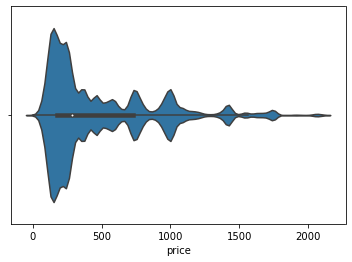

In [17]:
sns.violinplot(x=df_smartphones['price'])
q1=df_smartphones['price'].quantile(0.25)
q3 = df_smartphones['price'].quantile(0.75)
iqr = q3 - q1
outlier_threshold = q3 + (iqr *1.5)
# Nos quedamos con aquellos smatphones por debajo del thershold definido.
df_smartphones = df_smartphones[df_smartphones['price'] < outlier_threshold]
display_html(df_smartphones.head().style.hide_index())

# Vistas/Carritos/Compras 
A continuación se analiza la cantidad de vistas, carritos y compras en el dataframe smartphones. Luego, se representarán el *event_type* por día.

In [18]:
df_smartphones['event_type'].value_counts(normalize=True)

view       0.840
cart       0.080
purchase   0.079
Name: event_type, dtype: float64

Acá se observa que hay más carritos que compras. Esto puede deberse a que el dataset *smallsampled* fuer "mal muestreado"

# Smartphone Views: 1054477
# Smartphone Carts: 100901
# Smartphone Purchase: 99527

view        1054477
cart         100901
purchase      99527
Name: event_type, dtype: int64



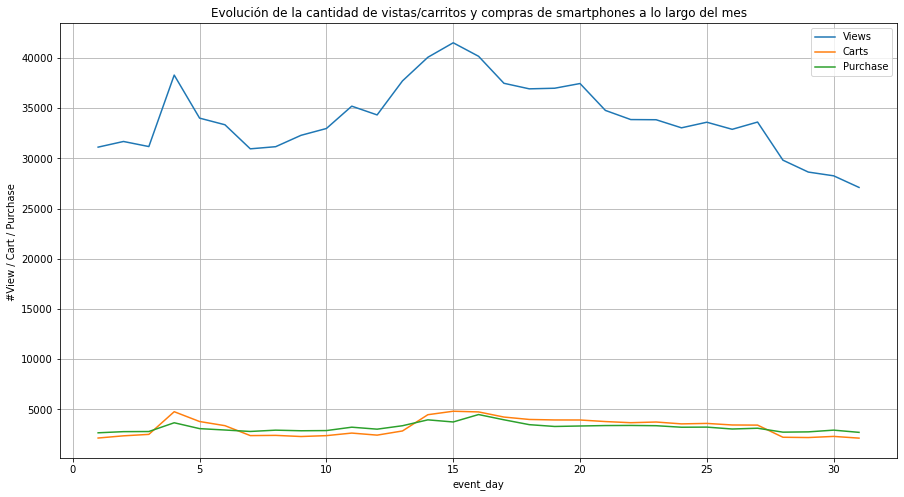

In [19]:
# Se representan vistas/carritos y compras de smartphones x día.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
df_smartphones[df_smartphones['event_type'] == 'view'].groupby('event_day').size().plot(ax=axes, label='Views')
df_smartphones[df_smartphones['event_type'] == 'cart'].groupby('event_day').size().plot(ax=axes, label='Carts')
df_smartphones[df_smartphones['event_type'] == 'purchase'].groupby('event_day').size().plot(ax=axes, label='Purchase')
axes.set_ylabel('#View / Cart / Purchase ')
axes.grid(which='both')
axes.legend()
axes.set_title('Evolución de la cantidad de vistas/carritos y compras de smartphones a lo largo del mes')

# Chequeo básico de que la suma de vistas/carritos y compras de todos los días 
# se corresponda con lo obtenido en el value_counts
print('# Smartphone Views: {:d}'.format(sum(df_smartphones[df_smartphones['event_type'] == 'view'].groupby('event_day').size())))
print('# Smartphone Carts: {:d}'.format(sum(df_smartphones[df_smartphones['event_type'] == 'cart'].groupby('event_day').size())))
print('# Smartphone Purchase: {:d}'.format(sum(df_smartphones[df_smartphones['event_type'] == 'purchase'].groupby('event_day').size())))
print('\r')
print(df_smartphones['event_type'].value_counts())
print('\r')

***TODO***: Al gráfico anterior, probablemente convenga representarlo en porcentual, de manera de no perderse en la cantidad absoluta.

In [20]:
# cantidad de marcas diferentes dentro del dataframe de smartphones
df_smartphones['brand'].nunique()

40

In [21]:
df_smartphones['brand'].value_counts(normalize=True)[:5]

samsung   0.350
apple     0.284
xiaomi    0.179
huawei    0.085
oppo      0.042
Name: brand, dtype: float64

In [22]:
# Existen marcas que no son muy representadas; por lo tanto, lo que se hace es 
# retener las primeras 5 marcas y al resto se las agrupa en "others"
brand_to_retain = df_smartphones['brand'].value_counts(normalize=True)[:5].index.to_list()
df_smartphones.loc[~(df_smartphones['brand'].isin(brand_to_retain)), 'brand'] = 'others'
df_smartphones['brand'].value_counts(normalize=True)

samsung   0.349
apple     0.283
xiaomi    0.179
huawei    0.085
others    0.062
oppo      0.042
Name: brand, dtype: float64

Veamos el tipo de evento, por marca, por día.

In [23]:
df_smartphones_view = df_smartphones[df_smartphones['event_type'] == 'view']
df_smartphones_cart = df_smartphones[df_smartphones['event_type'] == 'cart']
df_smartphones_purchase = df_smartphones[df_smartphones['event_type'] == 'purchase']

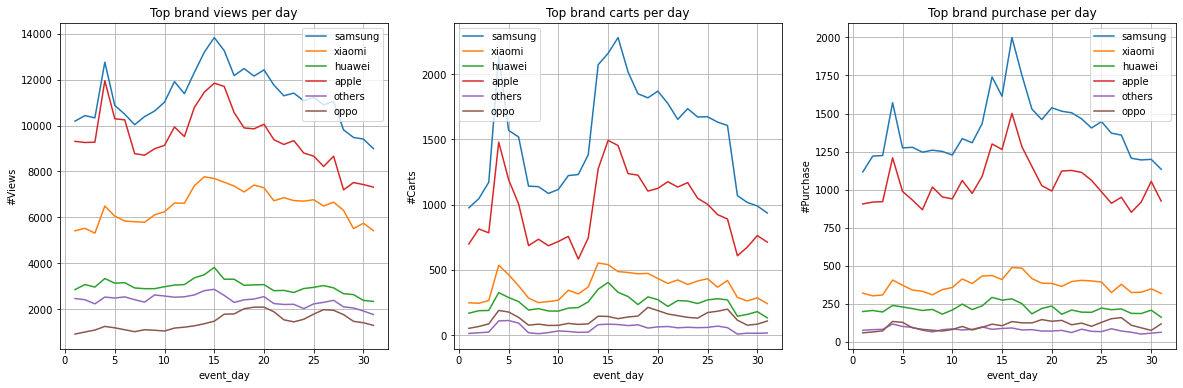

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
for k in (df_smartphones['brand'].unique()):  
  df_smartphones_view[df_smartphones_view['brand'] == k].groupby('event_day').size().plot(label=k, 
                                                                                          ax=axes[0], 
                                                                                          ylabel='#Views', 
                                                                                          grid='both', 
                                                                                          legend=True,
                                                                                          title='Top brand views per day')
  df_smartphones_cart[df_smartphones_cart['brand'] == k].groupby('event_day').size().plot(label=k, 
                                                                                          ax=axes[1], 
                                                                                          ylabel='#Carts', 
                                                                                          grid='both', 
                                                                                          legend=True,
                                                                                          title='Top brand carts per day')
  df_smartphones_purchase[df_smartphones_purchase['brand'] == k].groupby('event_day').size().plot(label=k, 
                                                                                                  ax=axes[2], 
                                                                                                  ylabel='#Purchase', 
                                                                                                  grid='both', 
                                                                                                  legend=True,
                                                                                                  title='Top brand purchase per day')


Se observa en las dos primeras marcas (samsung y apple) que las vistas, carritos y compras suelen tener lugar a inicio y mitad de mes. <br>
A continuación veremos el tipo de evento, por marca, por hora.

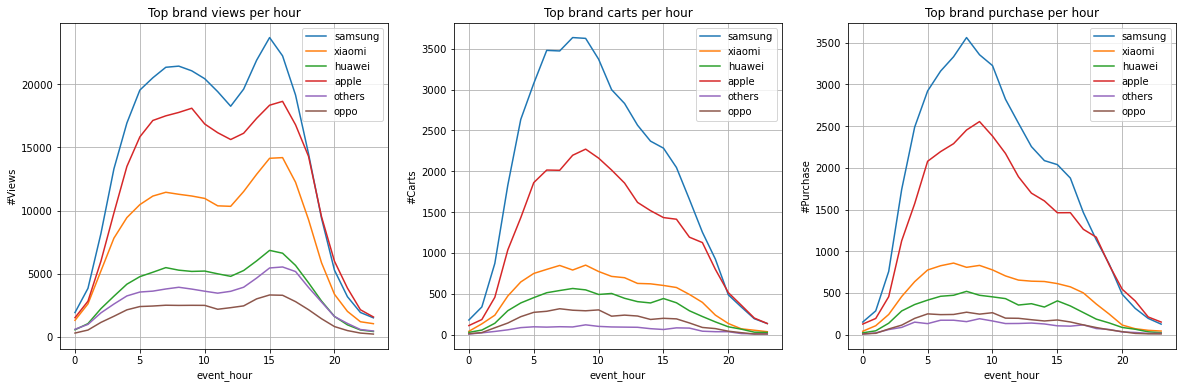

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
for k in (df_smartphones['brand'].unique()):  
  df_smartphones_view[df_smartphones_view['brand'] == k].groupby('event_hour').size().plot(label=k, 
                                                                                          ax=axes[0], 
                                                                                          ylabel='#Views', 
                                                                                          grid='both', 
                                                                                          legend=True,
                                                                                          title='Top brand views per hour')
  df_smartphones_cart[df_smartphones_cart['brand'] == k].groupby('event_hour').size().plot(label=k, 
                                                                                          ax=axes[1], 
                                                                                          ylabel='#Carts', 
                                                                                          grid='both', 
                                                                                          legend=True,
                                                                                          title='Top brand carts per hour')
  df_smartphones_purchase[df_smartphones_purchase['brand'] == k].groupby('event_hour').size().plot(label=k, 
                                                                                                  ax=axes[2], 
                                                                                                  ylabel='#Purchase', 
                                                                                                  grid='both', 
                                                                                                  legend=True,
                                                                                                  title='Top brand purchase per hour')

# Qué sería bueno agregar (de mínima):
- Cantidad de vistas/carrito/compras por id de usuario y sesión
- Relación entre *smartphones* y *computers*

**ANÁLISIS DE CLIENTES PRINCIPALES**

Retargeting: técnica de marketing digital cuyo objetivo es impactar a los usuarios que previamente han interactuado con una determinada marca.

Remarketing: sistema que permite crear anuncios adaptados o personalizados para los usuarios que, previamente, visitaron una página web.



---



**Nos concentramos en los usuarios que compraron.**

In [26]:
purchase_unique = df[df['event_type']=='purchase']['user_id'].nunique()
users = df['user_id'].nunique()
round(purchase_unique/users*100, 2) ##Hubo un 12.37% de éxito (compras/users)

12.37

Y los clientes más importantes son:

In [27]:
top_clients = 3
df[df['event_type']=='purchase']['user_id'].value_counts().head(top_clients)

512386086    301
543312954    177
549109608    154
Name: user_id, dtype: int64

Cuánto gastaron los clientes más importantes?

In [28]:
#La suma de los eventos totales por cliente.
print
(
df[df["user_id"]==512386086]["price"].sum(),
df[df["user_id"]==543312954]["price"].sum(),
df[df["user_id"]==549109608]["price"].sum()
)

(487847.61, 103773.53, 301147.55)

La distribución de eventos de los 3 clientes más importantes.

In [29]:
cliente_1 = df["user_id"]==512386086
cliente_1_= df[cliente_1]
cliente_1_.nunique()
cliente_1_.head(10)

cliente_2 = df["user_id"]==543312954
cliente_2_= df[cliente_2]
cliente_2_.nunique()
cliente_2_.head(10)

cliente_3 = df["user_id"]==549109608
cliente_3_= df[cliente_3]
cliente_3_.nunique()
cliente_3_.head(10)

,event_type,product_id,category_id,brand,price,user_id,user_session,event_month,event_day,event_hour,L0,L1,L2,L3
1360082,view,1004238,2053013555631882655,apple,1202.090,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,smartphone,None,None
1360173,cart,1004238,2053013555631882655,apple,1202.090,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,smartphone,None,None
1366485,purchase,1004238,2053013555631882655,apple,1202.090,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,smartphone,None,None
1367656,view,1002524,2053013555631882655,apple,513.530,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,smartphone,None,None
1367801,cart,1002524,2053013555631882655,apple,513.530,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,smartphone,None,None
1369669,purchase,1002524,2053013555631882655,apple,513.530,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,smartphone,None,None
1371213,view,5100577,2053013553341792533,samsung,295.890,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,clocks,None,None
1371302,cart,5100577,2053013553341792533,samsung,295.890,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,clocks,None,None
1372480,purchase,5100577,2053013553341792533,samsung,295.890,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,clocks,None,None
1373420,view,1004856,2053013555631882655,samsung,130.250,549109608,332fead8-6141-4242-970e-5b683383cb9f,10,2,4,electronics,smartphone,None,None


Cuántas vistas/carros hasta la compra de los 3 principales clientes?

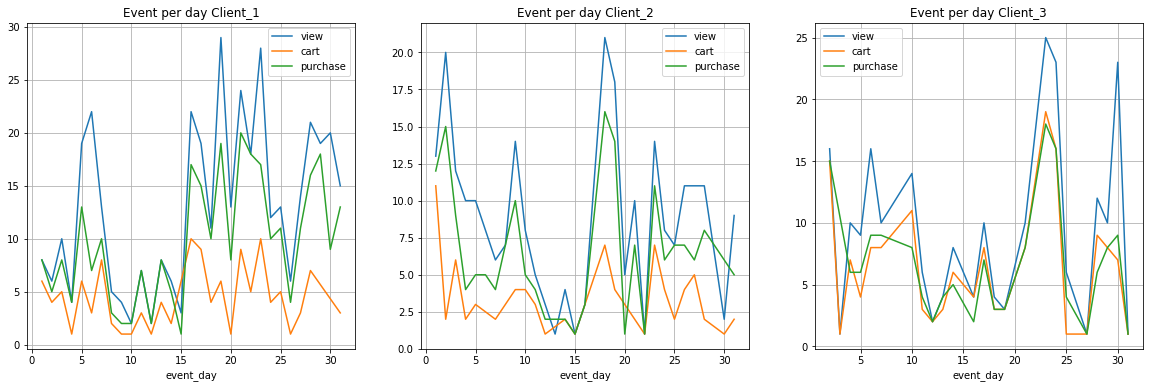

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
for k in (df['event_type'].unique()):
    cliente_1_[cliente_1_["event_type"]==k].groupby('event_day').size().plot(label=k, 
                                                                                  ax=axes[0],  
                                                                                  grid='both', 
                                                                                  legend=True,
                                                                                  title='Event per day Client_1')
    cliente_2_[cliente_2_["event_type"]==k].groupby('event_day').size().plot(label=k, 
                                                                                  ax=axes[1], 
                                                                                  grid='both', 
                                                                                  legend=True,
                                                                                  title='Event per day Client_2')
    cliente_3_[cliente_3_["event_type"]==k].groupby('event_day').size().plot(label=k, 
                                                                                  ax=axes[2], 
                                                                                  grid='both', 
                                                                                  legend=True,
                                                                                  title='Event per day Client_3')


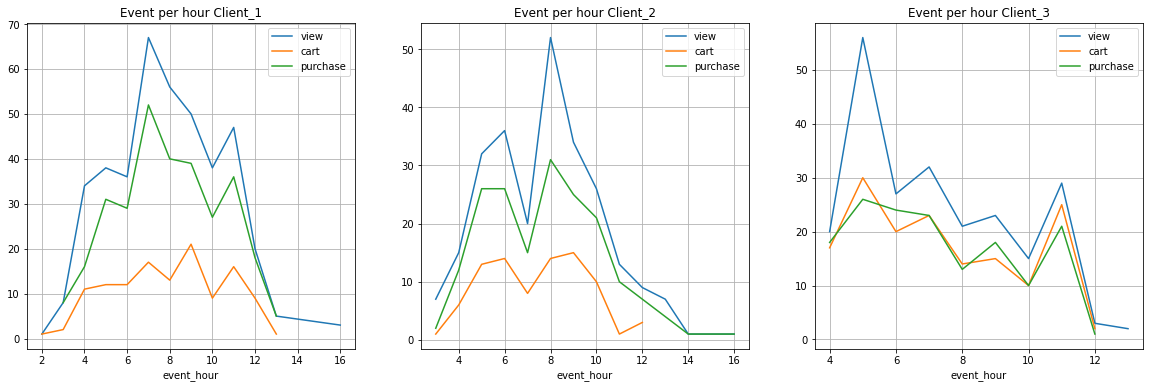

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
for k in (df['event_type'].unique()):
    cliente_1_[cliente_1_["event_type"]==k].groupby('event_hour').size().plot(label=k, 
                                                                                  ax=axes[0],  
                                                                                  grid='both', 
                                                                                  legend=True,
                                                                                  title='Event per hour Client_1')
    cliente_2_[cliente_2_["event_type"]==k].groupby('event_hour').size().plot(label=k, 
                                                                                  ax=axes[1], 
                                                                                  grid='both', 
                                                                                  legend=True,
                                                                                  title='Event per hour Client_2')
    cliente_3_[cliente_3_["event_type"]==k].groupby('event_hour').size().plot(label=k, 
                                                                                  ax=axes[2],  
                                                                                  grid='both', 
                                                                                  legend=True,
                                                                                  title='Event per hour Client_3')

Perfil $$$ de los eventos de los 3 clientes más importantes.

<AxesSubplot:xlabel='price'>

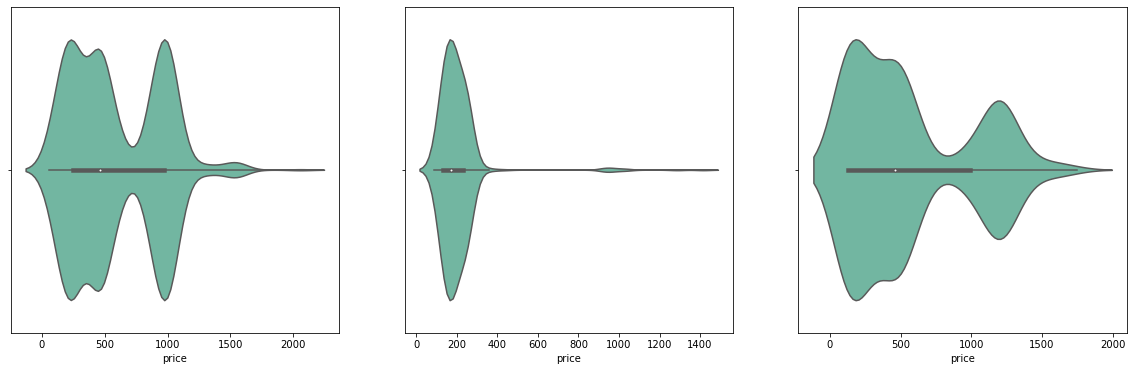

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
sns.violinplot(x=cliente_1_['price'], ax=axes[0], palette="Set2")
sns.violinplot(x=cliente_2_['price'], ax=axes[1], palette="Set2")
sns.violinplot(x=cliente_3_['price'], ax=axes[2], palette="Set2")

Compras de cada cliente principal por marcas.

In [33]:
###CLIENTE 1
purchase_cliente_1_=cliente_1_["event_type"]=="purchase"
compras_cliente_1=cliente_1_[purchase_cliente_1_]
###CLIENTE 2
purchase_cliente_2_=cliente_2_["event_type"]=="purchase"
compras_cliente_2=cliente_2_[purchase_cliente_2_]
###CLIENTE 3
purchase_cliente_3_=cliente_3_["event_type"]=="purchase"
compras_cliente_3=cliente_3_[purchase_cliente_3_]

<AxesSubplot:xlabel='brand', ylabel='price'>

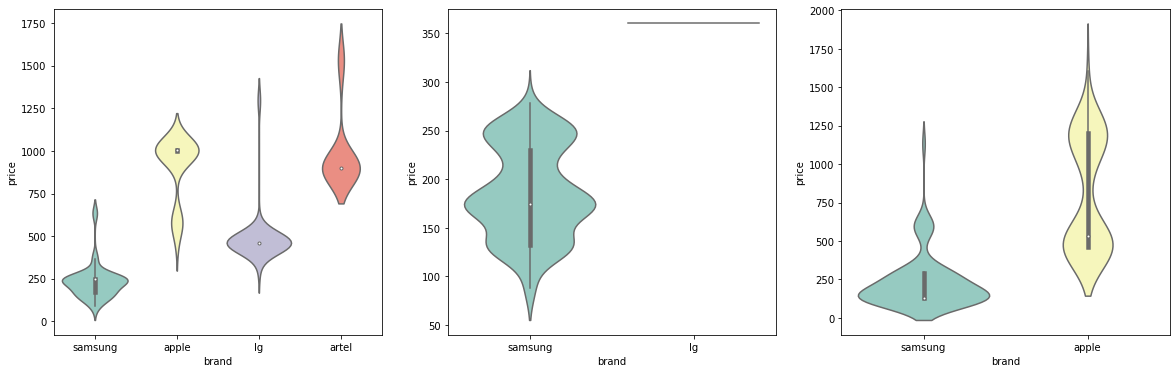

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
sns.violinplot(x="brand",y="price",data=compras_cliente_1,ax=axes[0], palette="Set3", order=["samsung", "apple", "lg", "artel"])
sns.violinplot(x="brand",y="price",data=compras_cliente_2,ax=axes[1], palette="Set3")
sns.violinplot(x="brand",y="price",data=compras_cliente_3,ax=axes[2], palette="Set3", order=["samsung", "apple"])

Distribuciones de precio de compras por día para cada cliente principal.

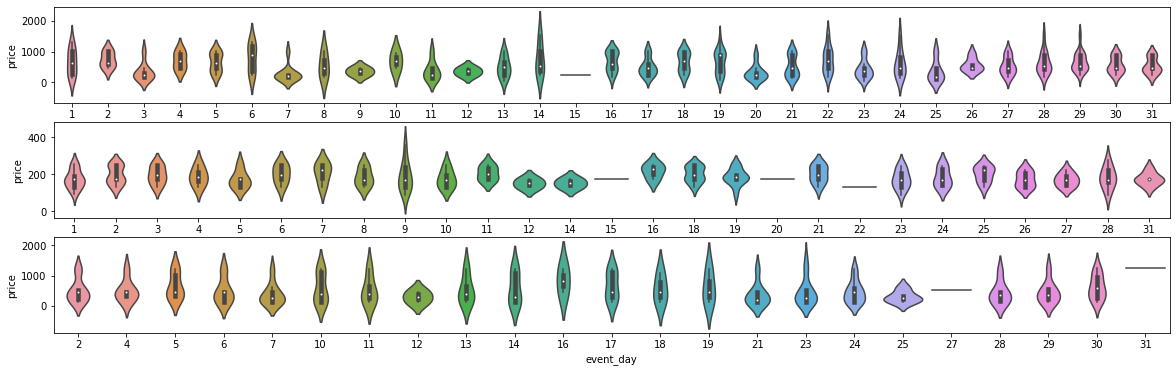

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,6))
ax = sns.violinplot(x="event_day", y="price", data=compras_cliente_1, ax=axes[0])
ax = sns.violinplot(x="event_day", y="price", data=compras_cliente_2, ax=axes[1])
ax = sns.violinplot(x="event_day", y="price", data=compras_cliente_3, ax=axes[2])

FILTROS DE COMPRAS DE PRODUCTOS

Ahora analizaremos en detalle las ***compras***. Filtro el dataset.

In [36]:
##FILTRADO DE COMPRAS, CREO UN DATASET "PURCHASE_OK"
purchase = df["event_type"]=="purchase"
purchase_ok=df[purchase]
purchase_ok["brand"].value_counts(normalize=True)[:5]

samsung   0.311
apple     0.256
xiaomi    0.083
huawei    0.043
oppo      0.020
Name: brand, dtype: float64

Analizamos el precio de estas **compras**.

In [37]:
purchase_ok['price'].describe()

count   173217.000
mean       360.213
std        366.978
min          0.880
25%        131.020
50%        225.130
75%        460.110
max       2574.070
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

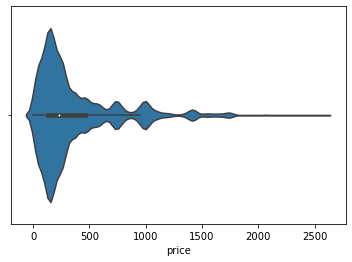

In [38]:
sns.violinplot(x=purchase_ok['price'])

Filtramos la marca con más ***COMPRAS*** == **SAMSUNG**

In [39]:
purchase_ok['brand'].describe()
top_brand_purchase=purchase_ok['brand']=="samsung"
samsung=purchase_ok[top_brand_purchase]
samsung.head()

,event_type,product_id,category_id,brand,price,user_id,user_session,event_month,event_day,event_hour,L0,L1,L2,L3
37677569,purchase,1004835,2053013555631882655,samsung,223.950,560390584,7b3e6578-da11-48f1-9733-d1a7bff76ff6,10,28,5,electronics,smartphone,None,None
35067524,purchase,1004856,2053013555631882655,samsung,130.990,564275399,312b2bdf-a0bd-4205-9f55-8c4d7f596cb2,10,26,6,electronics,smartphone,None,None
35384263,purchase,1004856,2053013555631882655,samsung,130.990,553665566,39696d58-5c02-4e7b-9549-e331b0e7199c,10,26,10,electronics,smartphone,None,None
6502740,purchase,1004767,2053013555631882655,samsung,251.590,557121973,c78a1b74-de1f-47c1-9573-79b900922b2f,10,6,5,electronics,smartphone,None,None
15059955,purchase,1004863,2053013555631882655,samsung,173.700,522744639,293377de-1a8a-4c48-a773-492f4108153f,10,12,11,electronics,smartphone,None,None


In [40]:
samsung.drop(columns=['brand'], inplace=True)   # Se elimina del dataset la columna event_time
samsung.drop(columns=['L3'], inplace=True)   # Se elimina del dataset la columna event_type porque es todo purchase
samsung.nunique()

C:\Users\ipave\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


event_type          1
product_id        452
category_id        23
price            2743
user_id         32599
user_session    49013
event_month         1
event_day          31
event_hour         24
L0                  4
L1                 10
L2                 16
dtype: int64

In [41]:
###EL 83% de los productos SAMSUNG VENDIDOS CORRESPONDEN A 1 SOLA CATEGORÍA
###Se podría analizar en mayor profundidad esa categoría, en vistas y cart
samsung["category_id"].value_counts(normalize=True)[:5]

2053013555631882655   0.831
2053013554415534427   0.052
2053013563810775923   0.029
2053013565983425517   0.028
2172371436436455782   0.016
Name: category_id, dtype: float64

In [42]:
###EL 93% de los productos SAMSUNG vendidos corresponden a ELECTRÓNICA
samsung["L0"].value_counts(normalize=True)

electronics   0.928
appliances    0.068
computers     0.003
stationery    0.000
Name: L0, dtype: float64

In [43]:
###EL 83.5% de los productos SAMSUNG vendidos corresponden a SMARTPHONES
samsung["L1"].value_counts(normalize=True)[:5]

smartphone    0.831
video         0.052
kitchen       0.040
environment   0.029
tablet        0.016
Name: L1, dtype: float64

In [44]:
###EL 37.7% de los productos SAMSUNG vendidos corresponden a TV.
###DEBE FALTAR ESTA DESCRIPCIÓN EN LA MAYORÍA DE LOS CASOS
samsung["L2"].value_counts(normalize=True)[:5]

tv              0.379
washer          0.213
vacuum          0.207
headphone       0.096
refrigerators   0.037
Name: L2, dtype: float64

In [45]:
samsung["L2"].value_counts().sum()/samsung["L1"].value_counts().sum() ###observar que hay muchos menos registros para L2 (falta data)

0.13673040999865196

<AxesSubplot:xlabel='price'>

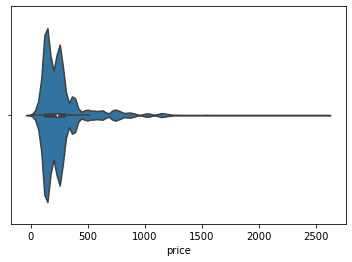

In [46]:
###VEAMOS LOS PRECIOS DE LA MARCA MÁS VENDIDA
sns.violinplot(x=samsung['price'])

<AxesSubplot:xlabel='price'>

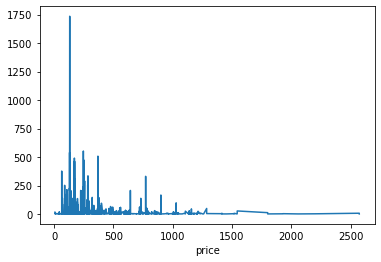

In [47]:
samsung.groupby('price').size().plot()


Como se observa en el Plot anterior hay un marcado pico en torno a los 150 dls...veremos de qué se trata -->

In [48]:
samsung['price'].value_counts() ##más precisamente alrededor de 130 dls

131.530    1736
130.990    1541
131.640    1474
131.020    1042
131.510     695
           ... 
200.390       1
193.260       1
97.040        1
212.060       1
514.110       1
Name: price, Length: 2743, dtype: int64

In [49]:
###Quitamos outliers
IQR = samsung['price'].quantile(0.75)- samsung['price'].quantile(0.25)

In [50]:
samsung_2=samsung[samsung["price"]<(IQR*1.5)] #me quedo con los registros de esa máscara
samsung_2['price'].describe()

count   27681.000
mean      149.723
std        40.479
min         6.670
25%       130.990
50%       131.920
75%       172.220
max       231.640
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

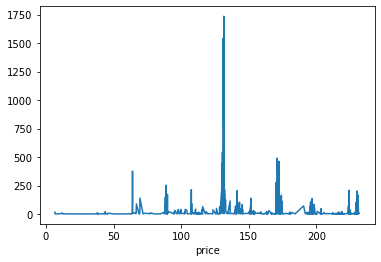

In [51]:
samsung_2['price'].value_counts(normalize=True)
samsung_2.groupby('price').size().plot()

<AxesSubplot:xlabel='event_day'>

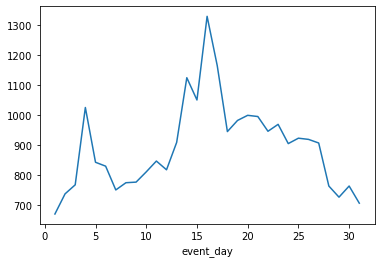

In [52]:
samsung_2.groupby('event_day').size().plot() 

<AxesSubplot:xlabel='event_hour'>

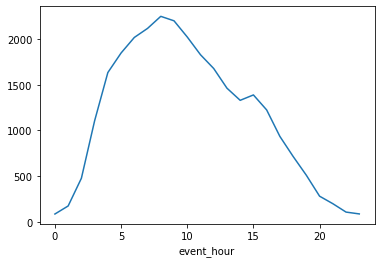

In [53]:
samsung_2.groupby('event_hour').size().plot()

<AxesSubplot:>

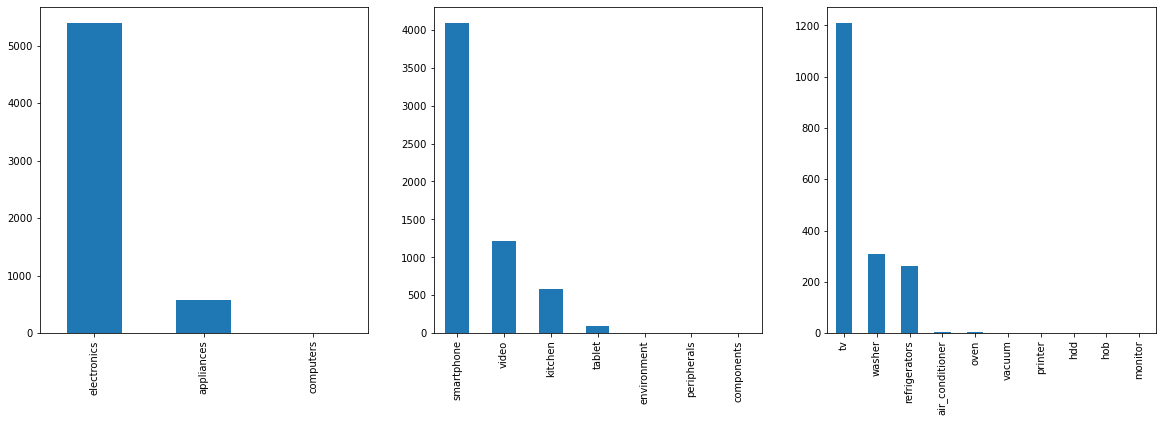

In [54]:
###GRAFICO LAS CATEGORIAS/SUBCATEGORIAS QUE SUPERAN EL LIMITE IQR*3 para VENTAS SAMSUNG
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
samsung[samsung['price'] > IQR*3].L0.value_counts().plot(kind='bar',ax=axes[0])
samsung[samsung['price'] > IQR*3].L1.value_counts().plot(kind='bar',ax=axes[1])
samsung[samsung['price'] > IQR*3].L2.value_counts().plot(kind='bar',ax=axes[2])

Ahora vemos los registros <IQR*1.5, la mayoría son smartphones

<AxesSubplot:>

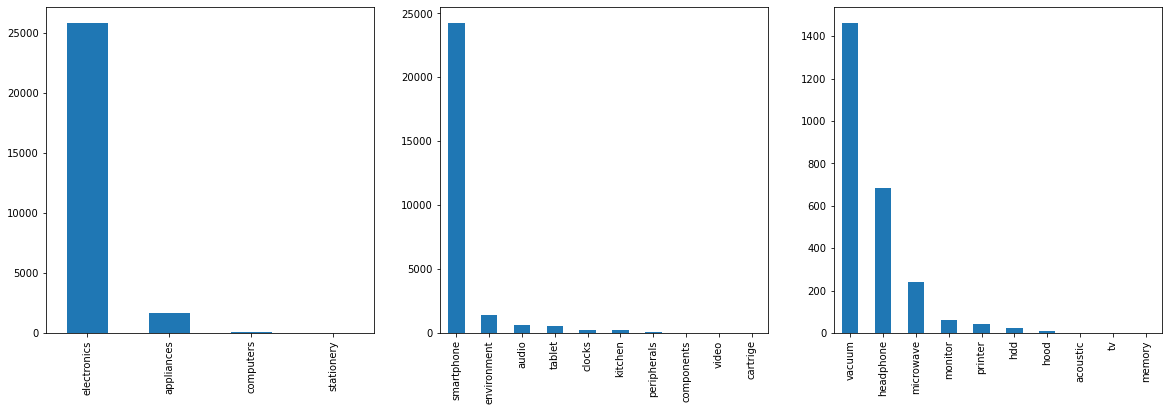

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
samsung_2.L0.value_counts().plot(kind='bar', ax=axes[0])
samsung_2.L1.value_counts().plot(kind='bar', ax=axes[1])
samsung_2.L2.value_counts().plot(kind='bar', ax=axes[2]) ##La categoría L2 debe tener muchos nulos

In [56]:
###TODOS ESTOS NA deben SER SMARTPHONES
samsung_2["L2"].isna().sum()

25144

Nos quedamos con los **SMARTPHONES SAMSUNG**.

In [57]:
###PRODUCTOS SAMSUNG: SMARTPHONES, filtrado con L1

samsung_phones=samsung['L1']=="smartphone"
samsung_smp=samsung[samsung_phones]
#samsung_smp.nunique()

In [58]:
samsung_smp.drop(columns=['category_id'], inplace=True)
samsung_smp.drop(columns=['L0'], inplace=True)
samsung_smp.drop(columns=['L1'], inplace=True)
samsung_smp.drop(columns=['L2'], inplace=True)

C:\Users\ipave\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
samsung_smp.describe()

,product_id,price,user_id,event_month,event_day,event_hour
count,43175.000,43175.000,43175.000,43175.000,43175.000,43175.000
mean,1004809.277,259.879,539727084.863,10.000,16.112,9.971
std,254.742,200.241,18164233.710,0.000,8.543,4.735
min,1000978.000,77.140,415873351.000,10.000,1.000,0.000
25%,1004767.000,131.760,519674628.500,10.000,9.000,6.000
50%,1004856.000,223.730,543312954.000,10.000,16.000,9.000
75%,1004870.000,254.760,556768195.000,10.000,23.000,13.000
max,1005225.000,1544.420,566252688.000,10.000,31.000,23.000


<AxesSubplot:xlabel='price'>

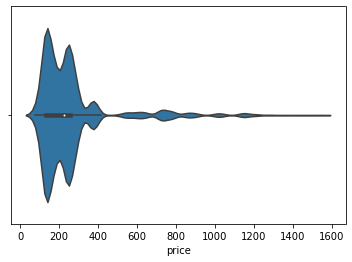

In [60]:
###PRECIO DE LOS SAMSUNG SMARTPHONES VENDIDOS
sns.violinplot(x=samsung_smp['price'])

In [61]:
###user_id es mucho menor que user_session --> repitieron compras
samsung_smp.nunique()

event_type          1
product_id        137
price            1848
user_id         26712
user_session    40647
event_month         1
event_day          31
event_hour         24
dtype: int64

In [62]:
###Veamos los 3 users_id que más compraron Samsung SMARTPHONES
user_rep = samsung_smp['user_id'].nunique()
samsung_smp['user_id'].value_counts(normalize=True)[:3]

543312954   0.004
512386086   0.002
558420737   0.002
Name: user_id, dtype: float64

<AxesSubplot:xlabel='price'>

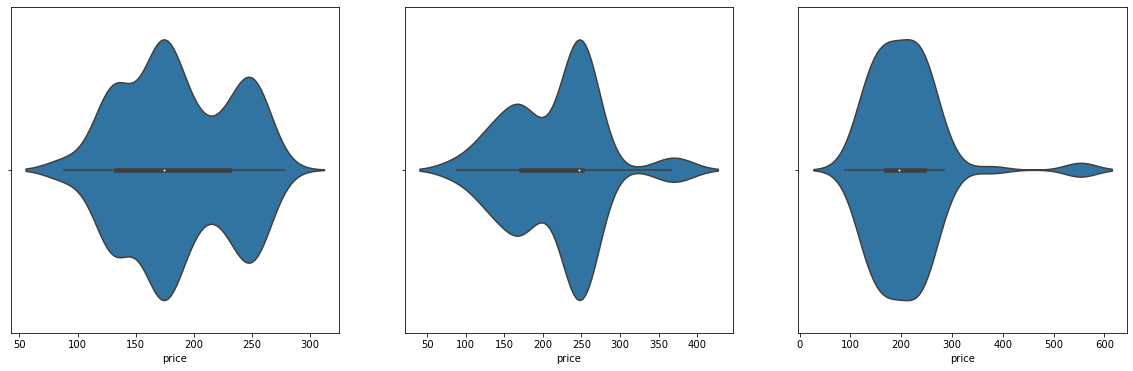

In [63]:
cliente_1 = samsung_smp["user_id"]==543312954
cliente_1_= samsung_smp[cliente_1]
cliente_2 = samsung_smp["user_id"]==512386086 
cliente_2_= samsung_smp[cliente_2]
cliente_3 = samsung_smp["user_id"]==558420737
cliente_3_= samsung_smp[cliente_3]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
sns.violinplot(x=cliente_1_['price'], ax=axes[0])
sns.violinplot(x=cliente_2_['price'], ax=axes[1])
sns.violinplot(x=cliente_3_['price'], ax=axes[2])